# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [35]:
df = pd.read_csv('mod07ex00.csv')
df

,Unnamed: 0,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
1,1,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
2,2,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,3,46.224658,2.106849,1,1,1,1,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
4,4,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,54.109589,9.884932,1,0,0,0,2.0,True,True,...,False,False,False,False,False,True,False,False,False,False
16646,16646,43.389041,7.380822,1,1,1,0,2.0,True,True,...,True,False,False,False,False,True,False,False,False,False
16647,16647,30.005479,9.800000,1,1,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16648,16648,30.005479,9.800000,1,1,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False


In [36]:
df.shape

(16650, 36)

In [37]:
df.drop_duplicates()
df.isna().sum()

Unnamed: 0                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher      

In [38]:
df.shape

(16650, 36)

In [39]:
df_sem_na = df.dropna(axis =1)
df_sem_na

,Unnamed: 0,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
1,1,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
2,2,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,3,46.224658,2.106849,1,1,1,1,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
4,4,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,54.109589,9.884932,1,0,0,0,2.0,True,True,...,False,False,False,False,False,True,False,False,False,False
16646,16646,43.389041,7.380822,1,1,1,0,2.0,True,True,...,True,False,False,False,False,True,False,False,False,False
16647,16647,30.005479,9.800000,1,1,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16648,16648,30.005479,9.800000,1,1,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False


In [40]:
df_sem_na.shape

(16650, 36)

In [41]:
df.dtypes

Unnamed: 0                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_F                                       bool
sexo_M                                       bool
posse_de_veiculo_N                           bool
posse_de_veiculo_Y                           bool
posse_de_imovel_N                            bool
posse_de_imovel_Y                            bool
tipo_renda_Commercial associate              bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [42]:
y = df['mau']

In [43]:
X = df.drop('mau', axis=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state = 100)

In [89]:
clf = DecisionTreeClassifier(random_state=100, max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)

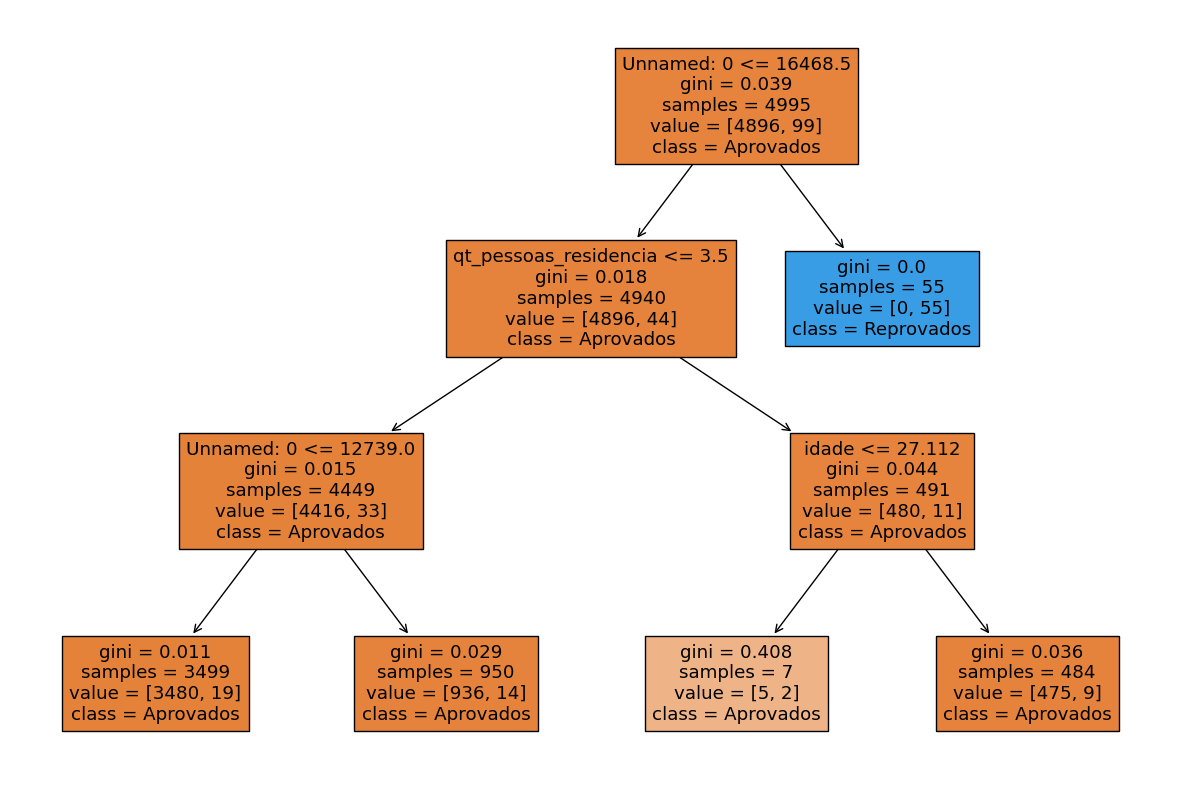

In [90]:
plt.figure(figsize=(15,10))
plot_tree(clf,
         filled=True,
         class_names = ['Aprovados', 'Reprovados'],
         feature_names = X.columns);

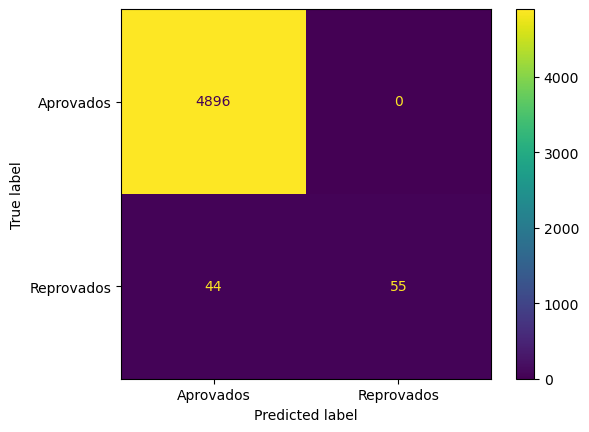

In [91]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [92]:
predict = clf.predict(X_train)

In [93]:
accuracy_score(y_train, predict)

0.9911911911911911

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [94]:
clf_test = DecisionTreeClassifier(random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_test = clf_test.fit(X_test, y_test)

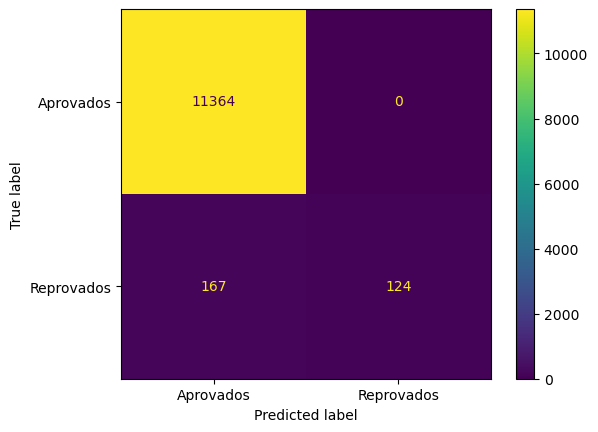

In [95]:
ConfusionMatrixDisplay.from_estimator(clf_test, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [96]:
predict_test = clf_test.predict(X_test)

In [97]:
accuracy_score(y_test, predict_test)

0.9856713856713857

In [98]:
print (f' A Accuracy do Teste foi  de {accuracy_score(y_test, predict_test) * 100:.2f}%')
print (f' A Accuracy do Teste foi  de {accuracy_score(y_train, predict) * 100:.2f}%')
print (f' A Diferença de foi de menos {accuracy_score(y_train, predict)- accuracy_score(y_test, predict_test):.2f}%')

 A Accuracy do Teste foi  de 98.57%
 A Accuracy do Teste foi  de 99.12%
 A Diferença de foi de menos 0.01%


In [114]:
clf_nova = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf_nova
clf_nova.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [113]:
plt.figure(figsize = [100, 100])
plot_tree(clf_nova,
        filled = True,
        class_names = ['Aprovados','Reprovados'],
        feature_names = X_train.columns);

In [120]:
aprovados = (predict == 0).sum() / len(predict)
aprovados * 100 

98.8988988988989

In [119]:
reprovados = (predict == 1).sum() / len(predict)
reprovados * 100 

1.1011011011011012

In [123]:
df['mau'] = df['mau'].replace(True, False)
df['mau'].value_counts()

mau
False    16650
Name: count, dtype: int64

In [134]:
y = df['mau']
X = df.drop('mau', axis = 1)

In [135]:
clf_all_bons = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf_all_bons.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

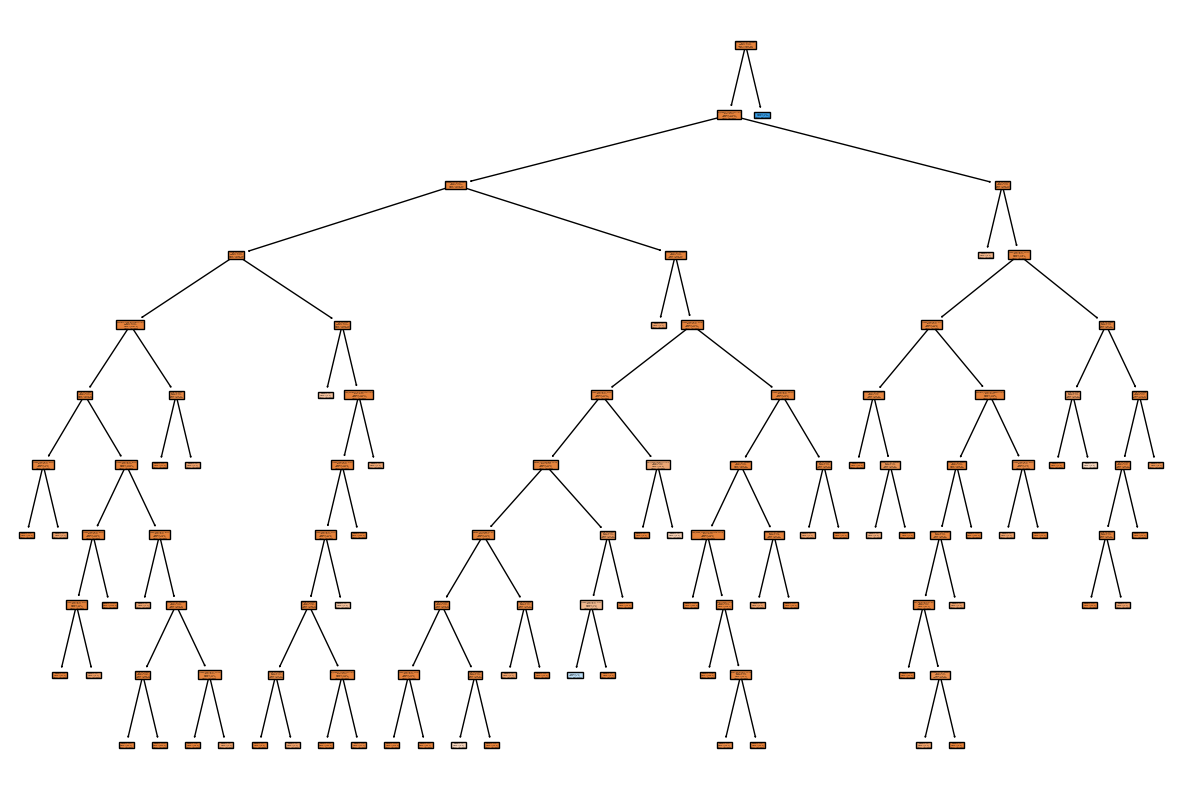

In [137]:
plt.figure(figsize = [15,10])
plot_tree(clf_all_bons,
         filled = True,
         class_names = ['Aprovados', 'Reprovados'],
         feature_names = X_train.columns);

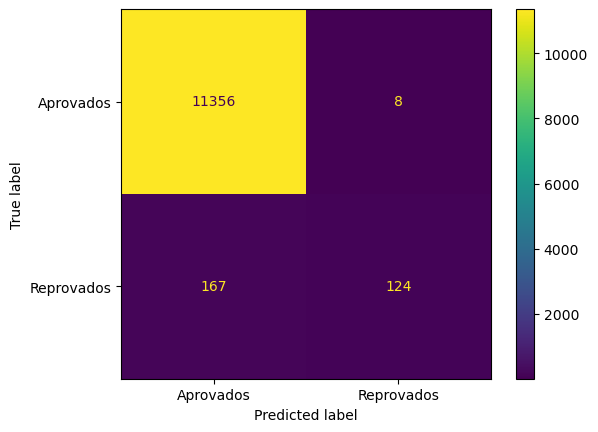

In [138]:
ConfusionMatrixDisplay.from_estimator(clf_all_bons, X_test, y_test, display_labels = ['Aprovados','Reprovados'])

In [140]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9854997854997855

Mesmo considerando todos os elementos bons pagadores, é possível que o projeto contenha erros, pois não foi atingida uma taxa de 100% de sucesso, portanto deve estar overfitting. 